## Getting Started

In [99]:
#Load all all of the packages we need.

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cenpy
from cenpy import products
import contextily as ctx
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
#Load in the SANDAG Database.
sandagvmt=gpd.read_file('San_Diego_Region_SB743_VMT_Maps/San_Diego_Region_SB743_VMT_Maps.shp') 

## Subsetting our data. 

We are concerned about data on the Census Tract level, for the estimated year 2025, using the most recently developed SANDAG model. We also subset for residents and VMT per capita to best match SB 743. 

In [3]:
gdf = sandagvmt[(sandagvmt['geo']=='Census Tract') & (sandagvmt['vmt_year']==2025) & (sandagvmt['version']=='ABM2+ / 2021 RP')&(sandagvmt['vmt_type']=='Residents') & (sandagvmt['vmt_metric']=='Per Capita')]

## Collect Census Data
We are using the Census API because of issues with cenpy. We are reading in variables concerning population, race, and household income.

In [4]:
import requests
#get=NAME,B01001_001E,B01001H_001E,B03002_001,B03002_003,B03002_004,B03002_005,B03002_006,B03002_007,B03002_008,B03002_009,B03002_012,B25119_001
r = requests.get('https://api.census.gov/data/2019/acs/acs5?get=NAME,B01001_001E,B01001H_001E,B03002_001E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_012E,B25119_001E,B25003_001E,B25003_003E&for=tract&in=state:06+county:073')
censusdata = r.json()
df=pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()

,NAME,B01001_001E,B01001H_001E,B03002_001E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,B03002_009E,B03002_012E,B25119_001E,B25003_001E,B25003_003E,state,county,tract
0,"Census Tract 165.04, San Diego County, California",6856,3138,6856,601,121,442,0,58,352,2144,46440,2511,1956,06,073,016504
1,"Census Tract 170.51, San Diego County, California",5188,2914,5188,346,0,737,168,0,448,575,106161,1988,765,06,073,017051
2,"Census Tract 170.53, San Diego County, California",3305,2552,3305,3,0,198,0,0,256,296,155208,1061,70,06,073,017053
3,"Census Tract 170.54, San Diego County, California",5731,4209,5731,82,9,370,0,0,252,809,101875,1874,455,06,073,017054
4,"Census Tract 170.52, San Diego County, California",5277,2629,5277,0,21,1530,23,150,267,657,103336,2221,1184,06,073,017052


In [5]:
df['pc_nonHispanicWhite'] = df.B01001H_001E.astype(float) / df.B01001_001E.astype(float) * 100 
ca=df[df['state']=='06']
sd=ca[ca['county']=='073']


In [6]:
sd.rename(columns={"B01001_001E":"total_pop","B01001H_001E":"white_nh","B25119_001E": "median_income", "B03002_001E": "total_race","B03002_004E":"black_nh", "B03002_005E":"native_na_alaska_nh","B03002_006E":"asian_nh","B03002_007E":"native_hi_pi_nh","B03002_008E":"other_race","B03002_009E":"mixed_race","B03002_012E": "total_hisp","B25003_001E":"total_housing", "B25003_003E":"total_renters"}, inplace=True)

sd['pc_Black'] = sd.black_nh.astype(float) / sd.total_pop.astype(float) * 100 
sd['pc_amindian'] = sd.native_na_alaska_nh.astype(float) / sd.total_pop.astype(float) * 100 
sd['pc_pacislander'] = sd.native_hi_pi_nh.astype(float) / sd.total_pop.astype(float) * 100
sd['pc_asian'] = sd.asian_nh.astype(float) / sd.total_pop.astype(float) * 100 
sd['pc_mixedrace'] = sd.mixed_race.astype(float) / sd.total_pop.astype(float) * 100 
sd['pc_hispanic'] = sd.total_hisp.astype(float) / sd.total_pop.astype(float) * 100 
sd['pc_other_race'] = sd.other_race.astype(float) / sd.total_pop.astype(float) * 100 

sd['pc_renter'] = sd.total_renters.astype(float) / sd.total_housing.astype(float) * 100


In [8]:
#Because we can't use cenpy,and because the SANDAG database does not have a GEOID Field, we need to load the tracts in with geometry
censustractsGDF = sandagvmt=gpd.read_file('San_Diego_Region_SB743_VMT_Maps/tl_2019_06_tract.shp') #Load in the Tracts with geometry so we can Database.

In [161]:
censustractsGDF = censustractsGDF[(censustractsGDF['COUNTYFP']=='073')]

In [70]:
joinDf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 628 entries, 3341 to 3967
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             628 non-null    int64   
 1   version              628 non-null    object  
 2   vmt_year             628 non-null    float64 
 3   year_txt             628 non-null    object  
 4   scenario_i           628 non-null    float64 
 5   geo                  628 non-null    object  
 6   geo_id               628 non-null    float64 
 7   name                 628 non-null    object  
 8   vmt_type             628 non-null    object  
 9   vmt_metric           628 non-null    object  
 10  persons              628 non-null    float64 
 11  vmt                  628 non-null    float64 
 12  vmt_per_ca           626 non-null    float64 
 13  pctmean              626 non-null    float64 
 14  pctmeantxt           626 non-null    object  
 15  map_legend 

In [9]:
sd['namesplit'] = sd['NAME'].str.split(',',expand=True,n=1)[0] #Split the name so we can join!

(628, 18)

In [10]:
print(sd.shape)
print(censustractsGDF.shape)

censustractsGDF = censustractsGDF.merge(sd,left_on='NAMELSAD',right_on='namesplit') #Join the Census Data to the Tract Ge information.

(628, 27)
(8057, 13)


#### The Join

In [11]:
censustractsGDF = censustractsGDF.to_crs('EPSG:2230')
#set the tract geometry to the centroids
censustractsGDF.geometry =censustractsGDF.representative_point() 

#create the spatial join #Spatial Join the SANDAG and Census Data!
joinDf=gpd.sjoin(gdf,censustractsGDF,how='left',predicate='intersects') 

In [12]:
joinDf['pctmean'].describe()

count    626.000000
mean       1.008026
std        0.342556
min        0.270102
25%        0.820923
50%        0.968856
75%        1.131512
max        3.663080
Name: pctmean, dtype: float64

#  Core Strategies we learned in URB PLN 229!

* API Calls for the US Census
* Joining
* Text Parsing and Splitting
* Spatial Joins
* K Means
* Mapping
* Regression (Linear + Logistic)

## Markdown Cell to explain purpose of the regulations and project. Aaron


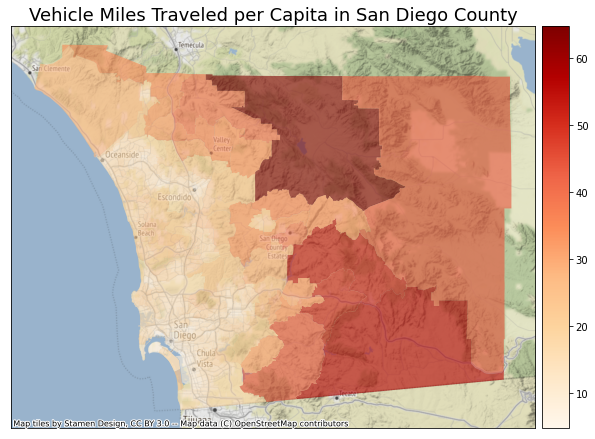

In [102]:
# VMT Map/ VMT Category Map
fig,ax = plt.subplots(figsize = (10,10))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1) # Reference: https://geopandas.org/en/stable/docs/user_guide/mapping.html
joinDf.plot('vmt_per_ca',  cmap='OrRd', legend=True,ax=ax,alpha=0.6,cax=cax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Vehicle Miles Traveled per Capita in San Diego County',fontsize=18)
ctx.add_basemap(ax,crs=2230)

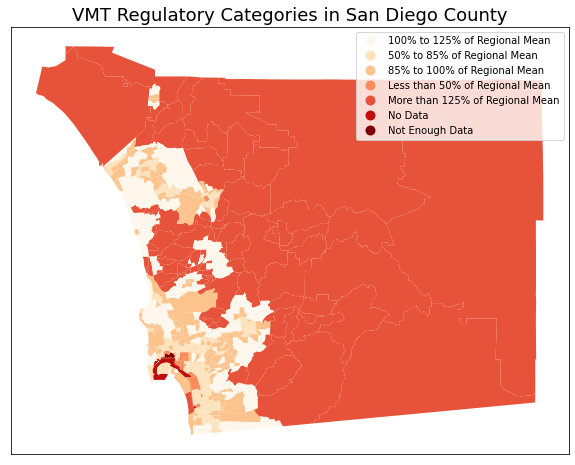

In [98]:
#VMT Category Map
vmt_reg_color = {'Less than 50% of Regional Mean':'green'}

fig0,ax0 = plt.subplots(figsize = (10,10))
joinDf.plot('map_legend',cmap='OrRd',categorical=True, legend=True,ax=ax0)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('VMT Regulatory Categories in San Diego County',fontsize=18)
ctx.add_basemap(ax,crs=2230)
handles,labels=ax0.get_legend_handles_labels()


#plt.legend(handler_map={})
#ax0.legend(handles, labels)

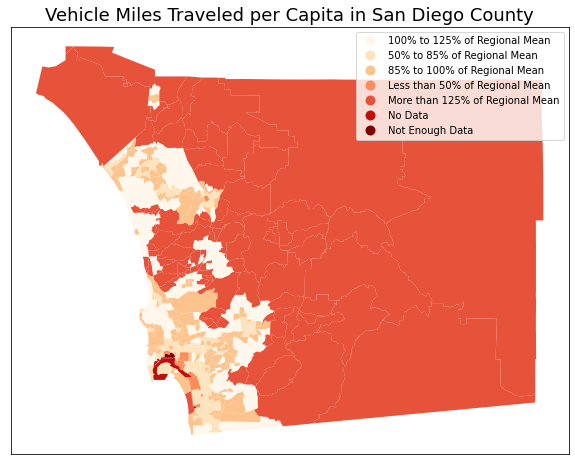

In [90]:
#VMT Category Map
fig0,ax0 = plt.subplots(figsize = (10,10))
joinDf.plot('map_legend',cmap='OrRd', legend=True,ax=ax0)
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_title('Vehicle Miles Traveled per Capita in San Diego County',fontsize=18)
ctx.add_basemap(ax,crs=2230)

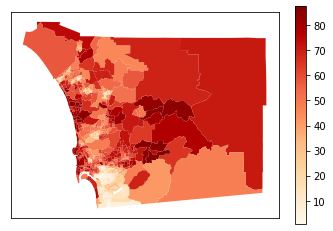

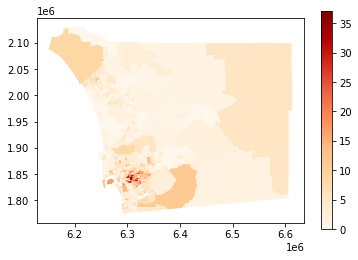

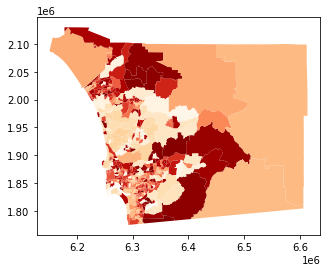

In [86]:
# Demographics Maps

ax0 = joinDf.plot('pc_nonHispanicWhite',cmap='OrRd',legend=True)
ax0.set_xticks([])
ax0.set_yticks([])


ax1 = joinDf.plot('pc_Black',  cmap='OrRd', legend=True)
ax2 =joinDf.plot('median_income',  cmap='OrRd', legend=False)




# Demographic and other maps.

In [15]:
#Markdown - Discuss Maps

(628, 59)

In [ ]:
# Scatter Plots and box plots for demographics and VMT!

In [16]:
joinDf.pctmean

3341    0.978482
3342    0.803511
3343    0.832956
3344    0.710646
3345    0.719706
          ...   
3963    0.865798
3964    1.010193
3965    0.475085
3966    0.760476
3967    1.132503
Name: pctmean, Length: 628, dtype: float64

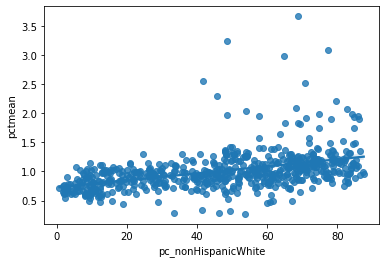

In [17]:
import seaborn as sns
ax = sns.regplot(x="pc_nonHispanicWhite", y="pctmean", data=joinDf) #Not a huge relation #Aaron to clean up. 

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

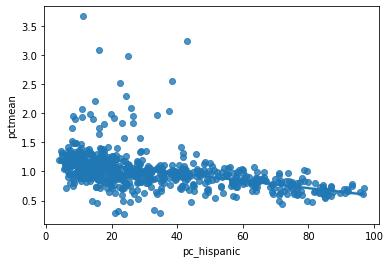

In [77]:
ax = sns.regplot(x="pc_hispanic", y="pctmean", data=joinDf) #Not a huge relation
ax.xlabel(['Percent Hispanic'])

In [170]:
joinDf.columns 

Index(['OBJECTID', 'version', 'vmt_year', 'year_txt', 'scenario_i', 'geo',
       'geo_id', 'name', 'vmt_type', 'vmt_metric', 'persons', 'vmt',
       'vmt_per_ca', 'pctmean', 'pctmeantxt', 'map_legend', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP',
       'TRACTCE', 'GEOID', 'NAME_x', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'NAME_y', 'total_pop', 'white_nh',
       'total_race', 'black_nh', 'native_na_alaska_nh', 'asian_nh',
       'native_hi_pi_nh', 'other_race', 'mixed_race', 'total_hisp',
       'median_income', 'total_housing', 'total_renters', 'state', 'county',
       'tract', 'pc_nonHispanicWhite', 'pc_Black', 'pc_amindian',
       'pc_pacislander', 'pc_asian', 'pc_mixedrace', 'pc_hispanic',
       'pc_other_race', 'namesplit', 'pc_renter'],
      dtype='object')

(0.0, 20.0)

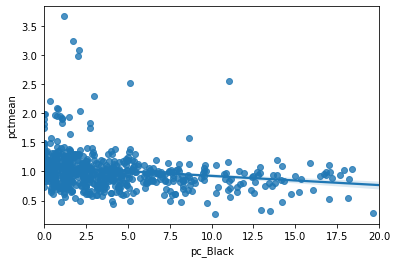

In [171]:
ax = sns.regplot(x="pc_Black", y="pctmean", data=joinDf)
ax.set_xlim(0,20)

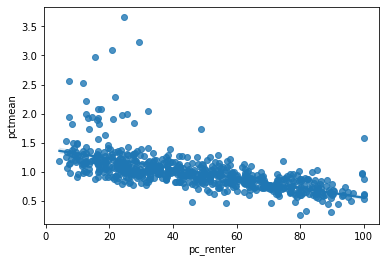

In [187]:
ax = sns.regplot(x="pc_renter", y="pctmean", data=joinDf)

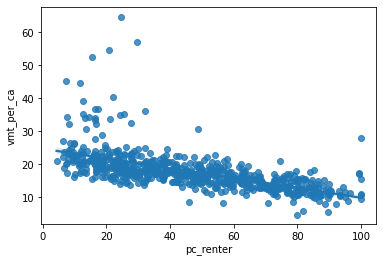

In [188]:
ax = sns.regplot(x="pc_renter", y="vmt_per_ca", data=joinDf)

Text(0.5, 1.0, 'Race by Percentage VMT')

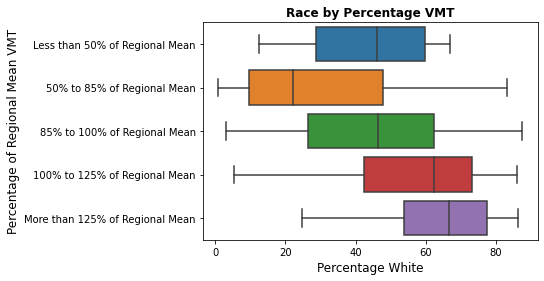

In [172]:
#join.boxplot(by='map_legend',column=['pc_nonHispanicWhite'],grid= False)  #Very Basic Boxplot - Looking at Percent white by categories of data!
#joinDf.sort_values(by='map_legend', ascending=True)
ax = sns.boxplot(y='map_legend', x='pc_nonHispanicWhite',data=joinDf, order=["Less than 50% of Regional Mean", "50% to 85% of Regional Mean", "85% to 100% of Regional Mean","100% to 125% of Regional Mean","More than 125% of Regional Mean"])
#plt.xticks(ticks=np.arange(0,5, step=1), rotation=70)
plt.xlabel('Percentage White', size='large')
plt.ylabel('Percentage of Regional Mean VMT', size='large')
plt.title("Race by Percentage VMT", weight='bold')

Text(0.5, 1.0, 'Race by Percentage VMT')

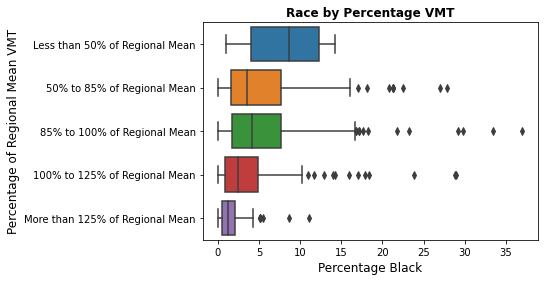

In [190]:
ax = sns.boxplot(y='map_legend', x='pc_Black',data=joinDf, order=["Less than 50% of Regional Mean", "50% to 85% of Regional Mean", "85% to 100% of Regional Mean","100% to 125% of Regional Mean","More than 125% of Regional Mean"])
#plt.xticks(ticks=np.arange(0,5, step=1), rotation=70)
plt.xlabel('Percentage Black', size='large')
plt.ylabel('Percentage of Regional Mean VMT', size='large')
plt.title("Race by Percentage VMT", weight='bold')

Text(0.5, 1.0, 'Race by Percentage VMT')

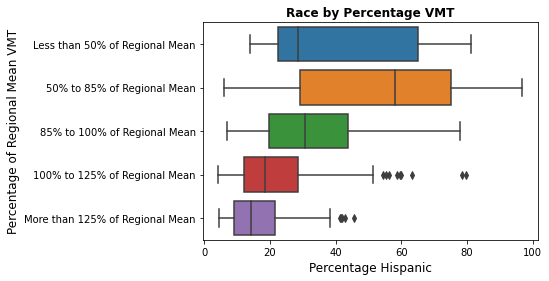

In [191]:
ax = sns.boxplot(y='map_legend', x='pc_hispanic',data=joinDf, order=["Less than 50% of Regional Mean", "50% to 85% of Regional Mean", "85% to 100% of Regional Mean","100% to 125% of Regional Mean","More than 125% of Regional Mean"])
#plt.xticks(ticks=np.arange(0,5, step=1), rotation=70)
plt.xlabel('Percentage Hispanic', size='large')
plt.ylabel('Percentage of Regional Mean VMT', size='large')
plt.title("Race by Percentage VMT", weight='bold')

Text(0.5, 1.0, 'Renter Status by Percentage VMT')

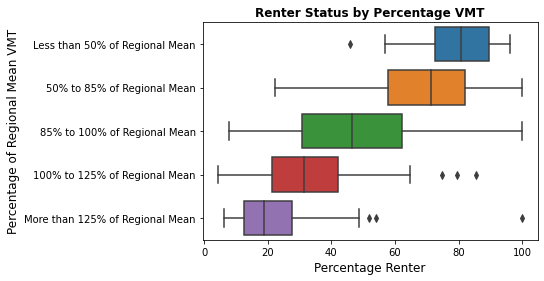

In [193]:
ax = sns.boxplot(y='map_legend', x='pc_renter',data=joinDf, order=["Less than 50% of Regional Mean", "50% to 85% of Regional Mean", "85% to 100% of Regional Mean","100% to 125% of Regional Mean","More than 125% of Regional Mean"])
#plt.xticks(ticks=np.arange(0,5, step=1), rotation=70)
plt.xlabel('Percentage Renter', size='large')
plt.ylabel('Percentage of Regional Mean VMT', size='large')
plt.title("Renter Status by Percentage VMT", weight='bold')

## K - Means Cluster Analysis


In [210]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

joinDf.dropna(inplace=True)

cols_to_plot = ['vmt','vmt_per_ca','total_pop','median_income','pc_nonHispanicWhite','pc_Black','pc_hispanic','pc_renter']

scaler = preprocessing.StandardScaler().fit(joinDf[cols_to_plot])
df_scaled = pd.DataFrame(scaler.transform(joinDf[cols_to_plot]), 
                         columns=cols_to_plot, index=joinDf.index)
df_scaled.dropna(inplace=True)


kmeans = KMeans(n_clusters=8, random_state=1).fit(df_scaled)


joinDf['cluster_id'] = kmeans.labels_

joinDf.head()

,OBJECTID,version,vmt_year,year_txt,scenario_i,geo,geo_id,name,vmt_type,vmt_metric,...,pc_Black,pc_amindian,pc_pacislander,pc_asian,pc_mixedrace,pc_hispanic,pc_other_race,namesplit,pc_renter,cluster_id
3341,3342,ABM2+ / 2021 RP,2025.0,2025,462.0,Census Tract,100.0,1,Residents,Per Capita,...,0.000000,0.000000,0.000000,3.621080,3.330100,15.809893,0.00000,Census Tract 1,11.764706,1
3342,3343,ABM2+ / 2021 RP,2025.0,2025,462.0,Census Tract,201.0,2.01,Residents,Per Capita,...,0.528821,0.581703,0.000000,3.966155,4.547858,7.403490,0.00000,Census Tract 2.01,49.166667,1
3343,3344,ABM2+ / 2021 RP,2025.0,2025,462.0,Census Tract,202.0,2.02,Residents,Per Capita,...,0.088067,0.000000,0.066050,8.344342,3.302510,13.562307,0.00000,Census Tract 2.02,57.736820,5
3344,3345,ABM2+ / 2021 RP,2025.0,2025,462.0,Census Tract,300.0,3,Residents,Per Capita,...,5.077305,0.000000,0.133613,2.786791,2.462302,16.625310,0.00000,Census Tract 3,74.234354,5
3345,3346,ABM2+ / 2021 RP,2025.0,2025,462.0,Census Tract,400.0,4,Residents,Per Capita,...,5.998421,0.000000,0.000000,11.312812,2.446725,23.257038,0.47356,Census Tract 4,82.630029,5


In [211]:
# code from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [212]:
#code from lecture 15
def radar_plot(kmeans, df_scaled):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T
    spoke_labels = [col for col in df_scaled.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(9, 9),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.9, .95),
                                labelspacing=0.1, fontsize='small')

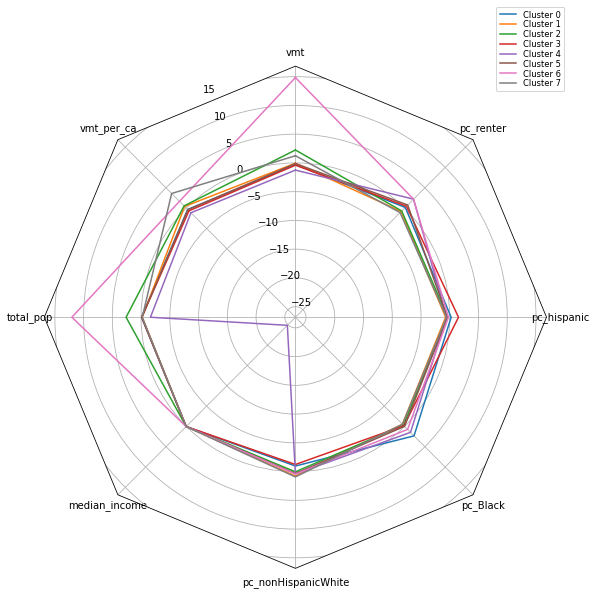

In [213]:
radar_plot(kmeans, df_scaled)

[]

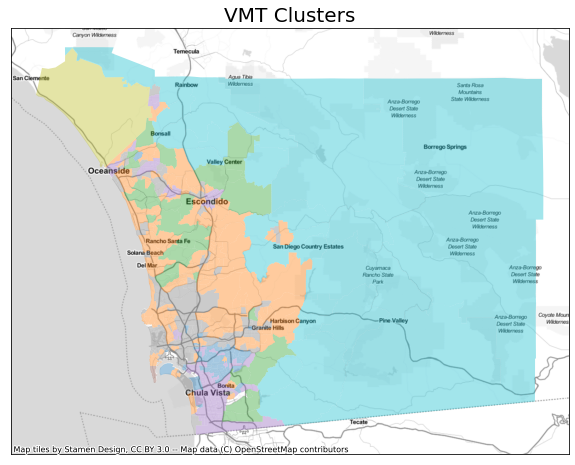

In [214]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(10,10))
joinDf.to_crs('EPSG:3857').plot('cluster_id', categorical=True, 
                                   ax=ax, alpha=0.4)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_title('VMT Clusters', fontsize=20)                           
ax.set_xticks([])
ax.set_yticks([])


In [215]:
joinDf.groupby('cluster_id')['vmt'].mean()

cluster_id
0    7.340713e+04
1    9.239111e+04
2    2.602035e+05
3    6.808669e+04
4    5.461460e+03
5    8.863992e+04
6    1.177638e+06
7    1.870096e+05
Name: vmt, dtype: float64

<AxesSubplot:>

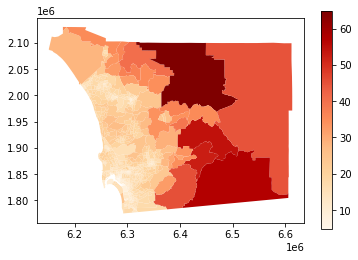

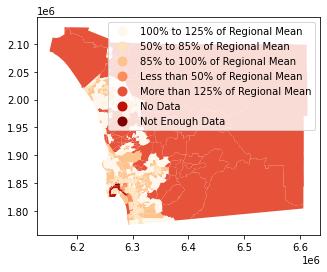

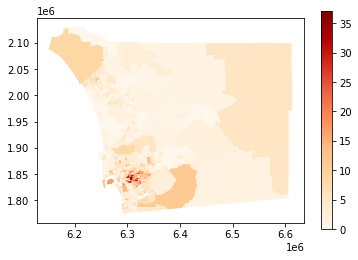

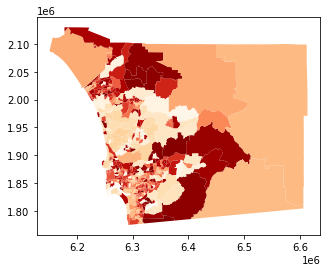

In [20]:
joinDf.plot('vmt_per_ca',  cmap='OrRd', legend=True)
joinDf.plot('map_legend',cmap='OrRd', legend=True)
joinDf.plot('pc_Black',  cmap='OrRd', legend=True)
joinDf.plot('median_income',  cmap='OrRd', legend=False)
#pc_hispanic